In [2]:
%matplotlib inline
import matplotlib.pyplot as plt

In [3]:
from sklearn.datasets import load_digits
# return_X_y默认为False，这种情况下则为一个Bunch对象，改为True，可以直接得到(data, target)
X, y = load_digits(return_X_y=True)

The digit in the image is 0


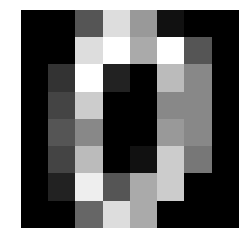

In [4]:
# 下面完成灰度图的绘制
# 灰度显示图像
plt.imshow(X[0].reshape(8, 8), cmap='gray');
# 关闭坐标轴
plt.axis('off')
# 格式化打印
print('The digit in the image is {}'.format(y[0]))

In [5]:
# 划分数据为训练集与测试集,添加stratify参数，以使得训练和测试数据集的类分布与整个数据集的类分布相同。
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

In [16]:
# 求出Logistic回归的精确度得分
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(solver='lbfgs', multi_class='auto', max_iter=5000, random_state=42)
clf.fit(self,X_train, y_train)
accuracy = clf.score(X_test, y_test)
print('Accuracy score of the {} is {:.2f}'.format(clf.__class__.__name__, accuracy))

NameError: name 'self' is not defined

In [7]:
# RandomForestClassifier轻松替换LogisticRegression分类器
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=42)
clf.fit(X_train, y_train)
accuracy = clf.score(X_test, y_test)
print('Accuracy score of the {} is {:.2f}'.format(clf.__class__.__name__, accuracy))

Accuracy score of the RandomForestClassifier is 0.96


In [8]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(solver='lbfgs', multi_class='auto', max_iter=5000, random_state=42)
clf.fit(X_train, y_train)
print('{} required {} iterations to be fitted'.format(clf.__class__.__name__, clf.n_iter_[0]))


ValueError: multi_class should be either multinomial or ovr, got auto

In [10]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

clf = LogisticRegression(solver='lbfgs', multi_class='auto', max_iter=1000, random_state=42)
clf.fit(X_train_scaled, y_train)
accuracy = clf.score(X_test_scaled, y_test)
print('Accuracy score of the {} is {:.2f}'.format(clf.__class__.__name__, accuracy))
print('{} required {} iterations to be fitted'.format(clf.__class__.__name__, clf.n_iter_[0]))

ValueError: multi_class should be either multinomial or ovr, got auto

In [11]:
from sklearn.pipeline import Pipeline

pipe = Pipeline(steps=[('scaler', MinMaxScaler()),
                       ('clf', LogisticRegression(solver='lbfgs', multi_class='auto', random_state=42))])

In [19]:
from sklearn.pipeline import make_pipeline
pipe = make_pipeline(MinMaxScaler(),
                     LogisticRegression(solver='lbfgs', multi_class='auto', random_state=42, max_iter=1000))

In [20]:
pipe.fit(X_train, y_train)
accuracy = pipe.score(X_test, y_test)
print('Accuracy score of the {} is {:.2f}'.format(pipe.__class__.__name__, accuracy))

ValueError: multi_class should be either multinomial or ovr, got auto

In [21]:
pipe.get_params()

{'logisticregression': LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
           intercept_scaling=1, max_iter=1000, multi_class='auto', n_jobs=1,
           penalty='l2', random_state=42, solver='lbfgs', tol=0.0001,
           verbose=0, warm_start=False),
 'logisticregression__C': 1.0,
 'logisticregression__class_weight': None,
 'logisticregression__dual': False,
 'logisticregression__fit_intercept': True,
 'logisticregression__intercept_scaling': 1,
 'logisticregression__max_iter': 1000,
 'logisticregression__multi_class': 'auto',
 'logisticregression__n_jobs': 1,
 'logisticregression__penalty': 'l2',
 'logisticregression__random_state': 42,
 'logisticregression__solver': 'lbfgs',
 'logisticregression__tol': 0.0001,
 'logisticregression__verbose': 0,
 'logisticregression__warm_start': False,
 'memory': None,
 'minmaxscaler': MinMaxScaler(copy=True, feature_range=(0, 1)),
 'minmaxscaler__copy': True,
 'minmaxscaler__feature_range': (0, 1),
 'steps': [('m

In [22]:
from sklearn.model_selection import cross_validate

pipe = make_pipeline(MinMaxScaler(),
                     LogisticRegression(solver='lbfgs', multi_class='auto',
                                        max_iter=1000, random_state=42))
scores = cross_validate(pipe, X, y, cv=3, return_train_score=True)

ValueError: multi_class should be either multinomial or ovr, got auto

In [15]:
import pandas as pd

df_scores = pd.DataFrame(scores)
df_scores

NameError: name 'scores' is not defined

In [23]:
from sklearn.model_selection import GridSearchCV

pipe = make_pipeline(MinMaxScaler(),
                     LogisticRegression(solver='saga', multi_class='auto',
                                        random_state=42, max_iter=5000))
param_grid = {'logisticregression__C': [0.1, 1.0, 10],
              'logisticregression__penalty': ['l2', 'l1']}
grid = GridSearchCV(pipe, param_grid=param_grid, cv=3, n_jobs=-1, return_train_score=True)
grid.fit(X_train, y_train)

JoblibValueError: JoblibValueError
___________________________________________________________________________
Multiprocessing exception:
...........................................................................
/Users/henry/anaconda/lib/python3.6/runpy.py in _run_module_as_main(mod_name='ipykernel_launcher', alter_argv=1)
    188         sys.exit(msg)
    189     main_globals = sys.modules["__main__"].__dict__
    190     if alter_argv:
    191         sys.argv[0] = mod_spec.origin
    192     return _run_code(code, main_globals, None,
--> 193                      "__main__", mod_spec)
        mod_spec = ModuleSpec(name='ipykernel_launcher', loader=<_f...b/python3.6/site-packages/ipykernel_launcher.py')
    194 
    195 def run_module(mod_name, init_globals=None,
    196                run_name=None, alter_sys=False):
    197     """Execute a module's code without importing it

...........................................................................
/Users/henry/anaconda/lib/python3.6/runpy.py in _run_code(code=<code object <module> at 0x105fa0300, file "/Use...3.6/site-packages/ipykernel_launcher.py", line 5>, run_globals={'__annotations__': {}, '__builtins__': <module 'builtins' (built-in)>, '__cached__': '/Users/henry/anaconda/lib/python3.6/site-packages/__pycache__/ipykernel_launcher.cpython-36.pyc', '__doc__': 'Entry point for launching an IPython kernel.\n\nTh...orts until\nafter removing the cwd from sys.path.\n', '__file__': '/Users/henry/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py', '__loader__': <_frozen_importlib_external.SourceFileLoader object>, '__name__': '__main__', '__package__': '', '__spec__': ModuleSpec(name='ipykernel_launcher', loader=<_f...b/python3.6/site-packages/ipykernel_launcher.py'), 'app': <module 'ipykernel.kernelapp' from '/Users/henry.../python3.6/site-packages/ipykernel/kernelapp.py'>, ...}, init_globals=None, mod_name='__main__', mod_spec=ModuleSpec(name='ipykernel_launcher', loader=<_f...b/python3.6/site-packages/ipykernel_launcher.py'), pkg_name='', script_name=None)
     80                        __cached__ = cached,
     81                        __doc__ = None,
     82                        __loader__ = loader,
     83                        __package__ = pkg_name,
     84                        __spec__ = mod_spec)
---> 85     exec(code, run_globals)
        code = <code object <module> at 0x105fa0300, file "/Use...3.6/site-packages/ipykernel_launcher.py", line 5>
        run_globals = {'__annotations__': {}, '__builtins__': <module 'builtins' (built-in)>, '__cached__': '/Users/henry/anaconda/lib/python3.6/site-packages/__pycache__/ipykernel_launcher.cpython-36.pyc', '__doc__': 'Entry point for launching an IPython kernel.\n\nTh...orts until\nafter removing the cwd from sys.path.\n', '__file__': '/Users/henry/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py', '__loader__': <_frozen_importlib_external.SourceFileLoader object>, '__name__': '__main__', '__package__': '', '__spec__': ModuleSpec(name='ipykernel_launcher', loader=<_f...b/python3.6/site-packages/ipykernel_launcher.py'), 'app': <module 'ipykernel.kernelapp' from '/Users/henry.../python3.6/site-packages/ipykernel/kernelapp.py'>, ...}
     86     return run_globals
     87 
     88 def _run_module_code(code, init_globals=None,
     89                     mod_name=None, mod_spec=None,

...........................................................................
/Users/henry/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py in <module>()
     11     # This is added back by InteractiveShellApp.init_path()
     12     if sys.path[0] == '':
     13         del sys.path[0]
     14 
     15     from ipykernel import kernelapp as app
---> 16     app.launch_new_instance()

...........................................................................
/Users/henry/anaconda/lib/python3.6/site-packages/traitlets/config/application.py in launch_instance(cls=<class 'ipykernel.kernelapp.IPKernelApp'>, argv=None, **kwargs={})
    653 
    654         If a global instance already exists, this reinitializes and starts it
    655         """
    656         app = cls.instance(**kwargs)
    657         app.initialize(argv)
--> 658         app.start()
        app.start = <bound method IPKernelApp.start of <ipykernel.kernelapp.IPKernelApp object>>
    659 
    660 #-----------------------------------------------------------------------------
    661 # utility functions, for convenience
    662 #-----------------------------------------------------------------------------

...........................................................................
/Users/henry/anaconda/lib/python3.6/site-packages/ipykernel/kernelapp.py in start(self=<ipykernel.kernelapp.IPKernelApp object>)
    472             return self.subapp.start()
    473         if self.poller is not None:
    474             self.poller.start()
    475         self.kernel.start()
    476         try:
--> 477             ioloop.IOLoop.instance().start()
    478         except KeyboardInterrupt:
    479             pass
    480 
    481 launch_new_instance = IPKernelApp.launch_instance

...........................................................................
/Users/henry/anaconda/lib/python3.6/site-packages/zmq/eventloop/ioloop.py in start(self=<zmq.eventloop.ioloop.ZMQIOLoop object>)
    172             )
    173         return loop
    174     
    175     def start(self):
    176         try:
--> 177             super(ZMQIOLoop, self).start()
        self.start = <bound method ZMQIOLoop.start of <zmq.eventloop.ioloop.ZMQIOLoop object>>
    178         except ZMQError as e:
    179             if e.errno == ETERM:
    180                 # quietly return on ETERM
    181                 pass

...........................................................................
/Users/henry/anaconda/lib/python3.6/site-packages/tornado/ioloop.py in start(self=<zmq.eventloop.ioloop.ZMQIOLoop object>)
    883                 self._events.update(event_pairs)
    884                 while self._events:
    885                     fd, events = self._events.popitem()
    886                     try:
    887                         fd_obj, handler_func = self._handlers[fd]
--> 888                         handler_func(fd_obj, events)
        handler_func = <function wrap.<locals>.null_wrapper>
        fd_obj = <zmq.sugar.socket.Socket object>
        events = 1
    889                     except (OSError, IOError) as e:
    890                         if errno_from_exception(e) == errno.EPIPE:
    891                             # Happens when the client closes the connection
    892                             pass

...........................................................................
/Users/henry/anaconda/lib/python3.6/site-packages/tornado/stack_context.py in null_wrapper(*args=(<zmq.sugar.socket.Socket object>, 1), **kwargs={})
    272         # Fast path when there are no active contexts.
    273         def null_wrapper(*args, **kwargs):
    274             try:
    275                 current_state = _state.contexts
    276                 _state.contexts = cap_contexts[0]
--> 277                 return fn(*args, **kwargs)
        args = (<zmq.sugar.socket.Socket object>, 1)
        kwargs = {}
    278             finally:
    279                 _state.contexts = current_state
    280         null_wrapper._wrapped = True
    281         return null_wrapper

...........................................................................
/Users/henry/anaconda/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py in _handle_events(self=<zmq.eventloop.zmqstream.ZMQStream object>, fd=<zmq.sugar.socket.Socket object>, events=1)
    435             # dispatch events:
    436             if events & IOLoop.ERROR:
    437                 gen_log.error("got POLLERR event on ZMQStream, which doesn't make sense")
    438                 return
    439             if events & IOLoop.READ:
--> 440                 self._handle_recv()
        self._handle_recv = <bound method ZMQStream._handle_recv of <zmq.eventloop.zmqstream.ZMQStream object>>
    441                 if not self.socket:
    442                     return
    443             if events & IOLoop.WRITE:
    444                 self._handle_send()

...........................................................................
/Users/henry/anaconda/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py in _handle_recv(self=<zmq.eventloop.zmqstream.ZMQStream object>)
    467                 gen_log.error("RECV Error: %s"%zmq.strerror(e.errno))
    468         else:
    469             if self._recv_callback:
    470                 callback = self._recv_callback
    471                 # self._recv_callback = None
--> 472                 self._run_callback(callback, msg)
        self._run_callback = <bound method ZMQStream._run_callback of <zmq.eventloop.zmqstream.ZMQStream object>>
        callback = <function wrap.<locals>.null_wrapper>
        msg = [<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>]
    473                 
    474         # self.update_state()
    475         
    476 

...........................................................................
/Users/henry/anaconda/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py in _run_callback(self=<zmq.eventloop.zmqstream.ZMQStream object>, callback=<function wrap.<locals>.null_wrapper>, *args=([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],), **kwargs={})
    409         close our socket."""
    410         try:
    411             # Use a NullContext to ensure that all StackContexts are run
    412             # inside our blanket exception handler rather than outside.
    413             with stack_context.NullContext():
--> 414                 callback(*args, **kwargs)
        callback = <function wrap.<locals>.null_wrapper>
        args = ([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],)
        kwargs = {}
    415         except:
    416             gen_log.error("Uncaught exception, closing connection.",
    417                           exc_info=True)
    418             # Close the socket on an uncaught exception from a user callback

...........................................................................
/Users/henry/anaconda/lib/python3.6/site-packages/tornado/stack_context.py in null_wrapper(*args=([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],), **kwargs={})
    272         # Fast path when there are no active contexts.
    273         def null_wrapper(*args, **kwargs):
    274             try:
    275                 current_state = _state.contexts
    276                 _state.contexts = cap_contexts[0]
--> 277                 return fn(*args, **kwargs)
        args = ([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],)
        kwargs = {}
    278             finally:
    279                 _state.contexts = current_state
    280         null_wrapper._wrapped = True
    281         return null_wrapper

...........................................................................
/Users/henry/anaconda/lib/python3.6/site-packages/ipykernel/kernelbase.py in dispatcher(msg=[<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>])
    278         if self.control_stream:
    279             self.control_stream.on_recv(self.dispatch_control, copy=False)
    280 
    281         def make_dispatcher(stream):
    282             def dispatcher(msg):
--> 283                 return self.dispatch_shell(stream, msg)
        msg = [<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>]
    284             return dispatcher
    285 
    286         for s in self.shell_streams:
    287             s.on_recv(make_dispatcher(s), copy=False)

...........................................................................
/Users/henry/anaconda/lib/python3.6/site-packages/ipykernel/kernelbase.py in dispatch_shell(self=<ipykernel.ipkernel.IPythonKernel object>, stream=<zmq.eventloop.zmqstream.ZMQStream object>, msg={'buffers': [], 'content': {'allow_stdin': True, 'code': 'from sklearn.model_selection import GridSearchCV...turn_train_score=True)\ngrid.fit(X_train, y_train)', 'silent': False, 'stop_on_error': True, 'store_history': True, 'user_expressions': {}}, 'header': {'date': datetime.datetime(2019, 1, 5, 2, 53, 31, 228704, tzinfo=tzutc()), 'msg_id': 'C5D562BD707C4B0A944BBFE3B8428E46', 'msg_type': 'execute_request', 'session': 'D99C10FAEDDE476086D74A43BB448CBD', 'username': 'username', 'version': '5.0'}, 'metadata': {}, 'msg_id': 'C5D562BD707C4B0A944BBFE3B8428E46', 'msg_type': 'execute_request', 'parent_header': {}})
    230             self.log.warn("Unknown message type: %r", msg_type)
    231         else:
    232             self.log.debug("%s: %s", msg_type, msg)
    233             self.pre_handler_hook()
    234             try:
--> 235                 handler(stream, idents, msg)
        handler = <bound method Kernel.execute_request of <ipykernel.ipkernel.IPythonKernel object>>
        stream = <zmq.eventloop.zmqstream.ZMQStream object>
        idents = [b'D99C10FAEDDE476086D74A43BB448CBD']
        msg = {'buffers': [], 'content': {'allow_stdin': True, 'code': 'from sklearn.model_selection import GridSearchCV...turn_train_score=True)\ngrid.fit(X_train, y_train)', 'silent': False, 'stop_on_error': True, 'store_history': True, 'user_expressions': {}}, 'header': {'date': datetime.datetime(2019, 1, 5, 2, 53, 31, 228704, tzinfo=tzutc()), 'msg_id': 'C5D562BD707C4B0A944BBFE3B8428E46', 'msg_type': 'execute_request', 'session': 'D99C10FAEDDE476086D74A43BB448CBD', 'username': 'username', 'version': '5.0'}, 'metadata': {}, 'msg_id': 'C5D562BD707C4B0A944BBFE3B8428E46', 'msg_type': 'execute_request', 'parent_header': {}}
    236             except Exception:
    237                 self.log.error("Exception in message handler:", exc_info=True)
    238             finally:
    239                 self.post_handler_hook()

...........................................................................
/Users/henry/anaconda/lib/python3.6/site-packages/ipykernel/kernelbase.py in execute_request(self=<ipykernel.ipkernel.IPythonKernel object>, stream=<zmq.eventloop.zmqstream.ZMQStream object>, ident=[b'D99C10FAEDDE476086D74A43BB448CBD'], parent={'buffers': [], 'content': {'allow_stdin': True, 'code': 'from sklearn.model_selection import GridSearchCV...turn_train_score=True)\ngrid.fit(X_train, y_train)', 'silent': False, 'stop_on_error': True, 'store_history': True, 'user_expressions': {}}, 'header': {'date': datetime.datetime(2019, 1, 5, 2, 53, 31, 228704, tzinfo=tzutc()), 'msg_id': 'C5D562BD707C4B0A944BBFE3B8428E46', 'msg_type': 'execute_request', 'session': 'D99C10FAEDDE476086D74A43BB448CBD', 'username': 'username', 'version': '5.0'}, 'metadata': {}, 'msg_id': 'C5D562BD707C4B0A944BBFE3B8428E46', 'msg_type': 'execute_request', 'parent_header': {}})
    394         if not silent:
    395             self.execution_count += 1
    396             self._publish_execute_input(code, parent, self.execution_count)
    397 
    398         reply_content = self.do_execute(code, silent, store_history,
--> 399                                         user_expressions, allow_stdin)
        user_expressions = {}
        allow_stdin = True
    400 
    401         # Flush output before sending the reply.
    402         sys.stdout.flush()
    403         sys.stderr.flush()

...........................................................................
/Users/henry/anaconda/lib/python3.6/site-packages/ipykernel/ipkernel.py in do_execute(self=<ipykernel.ipkernel.IPythonKernel object>, code='from sklearn.model_selection import GridSearchCV...turn_train_score=True)\ngrid.fit(X_train, y_train)', silent=False, store_history=True, user_expressions={}, allow_stdin=True)
    191 
    192         self._forward_input(allow_stdin)
    193 
    194         reply_content = {}
    195         try:
--> 196             res = shell.run_cell(code, store_history=store_history, silent=silent)
        res = undefined
        shell.run_cell = <bound method ZMQInteractiveShell.run_cell of <ipykernel.zmqshell.ZMQInteractiveShell object>>
        code = 'from sklearn.model_selection import GridSearchCV...turn_train_score=True)\ngrid.fit(X_train, y_train)'
        store_history = True
        silent = False
    197         finally:
    198             self._restore_input()
    199 
    200         if res.error_before_exec is not None:

...........................................................................
/Users/henry/anaconda/lib/python3.6/site-packages/ipykernel/zmqshell.py in run_cell(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, *args=('from sklearn.model_selection import GridSearchCV...turn_train_score=True)\ngrid.fit(X_train, y_train)',), **kwargs={'silent': False, 'store_history': True})
    528             )
    529         self.payload_manager.write_payload(payload)
    530 
    531     def run_cell(self, *args, **kwargs):
    532         self._last_traceback = None
--> 533         return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
        self.run_cell = <bound method ZMQInteractiveShell.run_cell of <ipykernel.zmqshell.ZMQInteractiveShell object>>
        args = ('from sklearn.model_selection import GridSearchCV...turn_train_score=True)\ngrid.fit(X_train, y_train)',)
        kwargs = {'silent': False, 'store_history': True}
    534 
    535     def _showtraceback(self, etype, evalue, stb):
    536         # try to preserve ordering of tracebacks and print statements
    537         sys.stdout.flush()

...........................................................................
/Users/henry/anaconda/lib/python3.6/site-packages/IPython/core/interactiveshell.py in run_cell(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, raw_cell='from sklearn.model_selection import GridSearchCV...turn_train_score=True)\ngrid.fit(X_train, y_train)', store_history=True, silent=False, shell_futures=True)
   2693                 self.displayhook.exec_result = result
   2694 
   2695                 # Execute the user code
   2696                 interactivity = "none" if silent else self.ast_node_interactivity
   2697                 has_raised = self.run_ast_nodes(code_ast.body, cell_name,
-> 2698                    interactivity=interactivity, compiler=compiler, result=result)
        interactivity = 'last_expr'
        compiler = <IPython.core.compilerop.CachingCompiler object>
   2699                 
   2700                 self.last_execution_succeeded = not has_raised
   2701 
   2702                 # Reset this so later displayed values do not modify the

...........................................................................
/Users/henry/anaconda/lib/python3.6/site-packages/IPython/core/interactiveshell.py in run_ast_nodes(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, nodelist=[<_ast.ImportFrom object>, <_ast.Assign object>, <_ast.Assign object>, <_ast.Assign object>, <_ast.Expr object>], cell_name='<ipython-input-23-8c158b6a11f0>', interactivity='last', compiler=<IPython.core.compilerop.CachingCompiler object>, result=<ExecutionResult object at 116652358, execution_..._before_exec=None error_in_exec=None result=None>)
   2803                     return True
   2804 
   2805             for i, node in enumerate(to_run_interactive):
   2806                 mod = ast.Interactive([node])
   2807                 code = compiler(mod, cell_name, "single")
-> 2808                 if self.run_code(code, result):
        self.run_code = <bound method InteractiveShell.run_code of <ipykernel.zmqshell.ZMQInteractiveShell object>>
        code = <code object <module> at 0x11664df60, file "<ipython-input-23-8c158b6a11f0>", line 9>
        result = <ExecutionResult object at 116652358, execution_..._before_exec=None error_in_exec=None result=None>
   2809                     return True
   2810 
   2811             # Flush softspace
   2812             if softspace(sys.stdout, 0):

...........................................................................
/Users/henry/anaconda/lib/python3.6/site-packages/IPython/core/interactiveshell.py in run_code(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, code_obj=<code object <module> at 0x11664df60, file "<ipython-input-23-8c158b6a11f0>", line 9>, result=<ExecutionResult object at 116652358, execution_..._before_exec=None error_in_exec=None result=None>)
   2857         outflag = True  # happens in more places, so it's easier as default
   2858         try:
   2859             try:
   2860                 self.hooks.pre_run_code_hook()
   2861                 #rprint('Running code', repr(code_obj)) # dbg
-> 2862                 exec(code_obj, self.user_global_ns, self.user_ns)
        code_obj = <code object <module> at 0x11664df60, file "<ipython-input-23-8c158b6a11f0>", line 9>
        self.user_global_ns = {'GridSearchCV': <class 'sklearn.model_selection._search.GridSearchCV'>, 'In': ['', "get_ipython().magic('matplotlib inline')", "get_ipython().magic('matplotlib inline')\nimport matplotlib.pyplot as plt", 'from sklearn.datasets import load_digits\n# retur...data, target)\nX, y = load_digits(return_X_y=True)', "# 下面完成灰度图的绘制\n# 灰度显示图像\nplt.imshow(X[0].reshape(8,...rint('The digit in the image is {}'.format(y[0]))", '# 划分数据为训练集与测试集,添加stratify参数，以使得训练和测试数据集的类分布与整个数据...ain_test_split(X, y, stratify=y, random_state=42)', "# 求出Logistic回归的精确度得分\nfrom sklearn.linear_model i...{:.2f}'.format(clf.__class__.__name__, accuracy))", "# RandomForestClassifier轻松替换LogisticRegression分类...{:.2f}'.format(clf.__class__.__name__, accuracy))", "from sklearn.linear_model import LogisticRegress...'.format(clf.__class__.__name__, clf.n_iter_[0]))", "rom sklearn.preprocessing import MinMaxScaler\nfr...'.format(clf.__class__.__name__, clf.n_iter_[0]))", "from sklearn.preprocessing import MinMaxScaler\nf...'.format(clf.__class__.__name__, clf.n_iter_[0]))", "from sklearn.pipeline import Pipeline\n\npipe = Pi...='lbfgs', multi_class='auto', random_state=42))])", "pipe.fit(X_train, y_train)\naccuracy = pipe.score...:.2f}'.format(pipe.__class__.__name__, accuracy))", 'rom sklearn.model_selection import cross_validat...lidate(pipe, X, y, cv=3, return_train_score=True)', 'from sklearn.model_selection import cross_valida...lidate(pipe, X, y, cv=3, return_train_score=True)', 'import pandas as pd\n\ndf_scores = pd.DataFrame(scores)\ndf_scores', "# 求出Logistic回归的精确度得分\nfrom sklearn.linear_model i...{:.2f}'.format(clf.__class__.__name__, accuracy))", "from sklearn.pipeline import make_pipeline\npipe ...ti_class='auto', random_state=42, max_iter=1000))", "pipe.fit(X_train, y_train)\naccuracy = pipe.score...:.2f}'.format(pipe.__class__.__name__, accuracy))", "from sklearn.pipeline import make_pipeline\npipe ...ti_class='auto', random_state=42, max_iter=1000))", ...], 'LogisticRegression': <class 'sklearn.linear_model.logistic.LogisticRegression'>, 'MinMaxScaler': <class 'sklearn.preprocessing.data.MinMaxScaler'>, 'Out': {21: {'logisticregression': LogisticRegression(C=1.0, class_weight=None, dua...ol=0.0001,
          verbose=0, warm_start=False), 'logisticregression__C': 1.0, 'logisticregression__class_weight': None, 'logisticregression__dual': False, 'logisticregression__fit_intercept': True, 'logisticregression__intercept_scaling': 1, 'logisticregression__max_iter': 1000, 'logisticregression__multi_class': 'auto', 'logisticregression__n_jobs': 1, 'logisticregression__penalty': 'l2', ...}}, 'Pipeline': <class 'sklearn.pipeline.Pipeline'>, 'RandomForestClassifier': <class 'sklearn.ensemble.forest.RandomForestClassifier'>, 'X': array([[  0.,   0.,   5., ...,   0.,   0.,   0.]...      [  0.,   0.,  10., ...,  12.,   1.,   0.]]), 'X_test': array([[  0.,   0.,   8., ...,   0.,   0.,   0.]...      [  0.,   0.,   0., ...,   2.,   0.,   0.]]), 'X_test_scaled': array([[ 0.    ,  0.    ,  0.5   , ...,  0.    ,....    ,  0.    , ...,  0.125 ,  0.    ,  0.    ]]), ...}
        self.user_ns = {'GridSearchCV': <class 'sklearn.model_selection._search.GridSearchCV'>, 'In': ['', "get_ipython().magic('matplotlib inline')", "get_ipython().magic('matplotlib inline')\nimport matplotlib.pyplot as plt", 'from sklearn.datasets import load_digits\n# retur...data, target)\nX, y = load_digits(return_X_y=True)', "# 下面完成灰度图的绘制\n# 灰度显示图像\nplt.imshow(X[0].reshape(8,...rint('The digit in the image is {}'.format(y[0]))", '# 划分数据为训练集与测试集,添加stratify参数，以使得训练和测试数据集的类分布与整个数据...ain_test_split(X, y, stratify=y, random_state=42)', "# 求出Logistic回归的精确度得分\nfrom sklearn.linear_model i...{:.2f}'.format(clf.__class__.__name__, accuracy))", "# RandomForestClassifier轻松替换LogisticRegression分类...{:.2f}'.format(clf.__class__.__name__, accuracy))", "from sklearn.linear_model import LogisticRegress...'.format(clf.__class__.__name__, clf.n_iter_[0]))", "rom sklearn.preprocessing import MinMaxScaler\nfr...'.format(clf.__class__.__name__, clf.n_iter_[0]))", "from sklearn.preprocessing import MinMaxScaler\nf...'.format(clf.__class__.__name__, clf.n_iter_[0]))", "from sklearn.pipeline import Pipeline\n\npipe = Pi...='lbfgs', multi_class='auto', random_state=42))])", "pipe.fit(X_train, y_train)\naccuracy = pipe.score...:.2f}'.format(pipe.__class__.__name__, accuracy))", 'rom sklearn.model_selection import cross_validat...lidate(pipe, X, y, cv=3, return_train_score=True)', 'from sklearn.model_selection import cross_valida...lidate(pipe, X, y, cv=3, return_train_score=True)', 'import pandas as pd\n\ndf_scores = pd.DataFrame(scores)\ndf_scores', "# 求出Logistic回归的精确度得分\nfrom sklearn.linear_model i...{:.2f}'.format(clf.__class__.__name__, accuracy))", "from sklearn.pipeline import make_pipeline\npipe ...ti_class='auto', random_state=42, max_iter=1000))", "pipe.fit(X_train, y_train)\naccuracy = pipe.score...:.2f}'.format(pipe.__class__.__name__, accuracy))", "from sklearn.pipeline import make_pipeline\npipe ...ti_class='auto', random_state=42, max_iter=1000))", ...], 'LogisticRegression': <class 'sklearn.linear_model.logistic.LogisticRegression'>, 'MinMaxScaler': <class 'sklearn.preprocessing.data.MinMaxScaler'>, 'Out': {21: {'logisticregression': LogisticRegression(C=1.0, class_weight=None, dua...ol=0.0001,
          verbose=0, warm_start=False), 'logisticregression__C': 1.0, 'logisticregression__class_weight': None, 'logisticregression__dual': False, 'logisticregression__fit_intercept': True, 'logisticregression__intercept_scaling': 1, 'logisticregression__max_iter': 1000, 'logisticregression__multi_class': 'auto', 'logisticregression__n_jobs': 1, 'logisticregression__penalty': 'l2', ...}}, 'Pipeline': <class 'sklearn.pipeline.Pipeline'>, 'RandomForestClassifier': <class 'sklearn.ensemble.forest.RandomForestClassifier'>, 'X': array([[  0.,   0.,   5., ...,   0.,   0.,   0.]...      [  0.,   0.,  10., ...,  12.,   1.,   0.]]), 'X_test': array([[  0.,   0.,   8., ...,   0.,   0.,   0.]...      [  0.,   0.,   0., ...,   2.,   0.,   0.]]), 'X_test_scaled': array([[ 0.    ,  0.    ,  0.5   , ...,  0.    ,....    ,  0.    , ...,  0.125 ,  0.    ,  0.    ]]), ...}
   2863             finally:
   2864                 # Reset our crash handler in place
   2865                 sys.excepthook = old_excepthook
   2866         except SystemExit as e:

...........................................................................
/Users/henry/Workspace/Code/Python/scikit-learn/<ipython-input-23-8c158b6a11f0> in <module>()
      4                      LogisticRegression(solver='saga', multi_class='auto',
      5                                         random_state=42, max_iter=5000))
      6 param_grid = {'logisticregression__C': [0.1, 1.0, 10],
      7               'logisticregression__penalty': ['l2', 'l1']}
      8 grid = GridSearchCV(pipe, param_grid=param_grid, cv=3, n_jobs=-1, return_train_score=True)
----> 9 grid.fit(X_train, y_train)

...........................................................................
/Users/henry/anaconda/lib/python3.6/site-packages/sklearn/model_selection/_search.py in fit(self=GridSearchCV(cv=3, error_score='raise',
       e...train_score=True,
       scoring=None, verbose=0), X=array([[  0.,   2.,  12., ...,  15.,   3.,   0.]...      [  0.,   0.,   7., ...,  14.,   6.,   0.]]), y=array([2, 1, 2, ..., 9, 8, 9]), groups=None, **fit_params={})
    633                                   return_train_score=self.return_train_score,
    634                                   return_n_test_samples=True,
    635                                   return_times=True, return_parameters=False,
    636                                   error_score=self.error_score)
    637           for parameters, (train, test) in product(candidate_params,
--> 638                                                    cv.split(X, y, groups)))
        cv.split = <bound method StratifiedKFold.split of Stratifie...ld(n_splits=3, random_state=None, shuffle=False)>
        X = array([[  0.,   2.,  12., ...,  15.,   3.,   0.]...      [  0.,   0.,   7., ...,  14.,   6.,   0.]])
        y = array([2, 1, 2, ..., 9, 8, 9])
        groups = None
    639 
    640         # if one choose to see train score, "out" will contain train score info
    641         if self.return_train_score:
    642             (train_score_dicts, test_score_dicts, test_sample_counts, fit_time,

...........................................................................
/Users/henry/anaconda/lib/python3.6/site-packages/sklearn/externals/joblib/parallel.py in __call__(self=Parallel(n_jobs=-1), iterable=<generator object BaseSearchCV.fit.<locals>.<genexpr>>)
    784             if pre_dispatch == "all" or n_jobs == 1:
    785                 # The iterable was consumed all at once by the above for loop.
    786                 # No need to wait for async callbacks to trigger to
    787                 # consumption.
    788                 self._iterating = False
--> 789             self.retrieve()
        self.retrieve = <bound method Parallel.retrieve of Parallel(n_jobs=-1)>
    790             # Make sure that we get a last message telling us we are done
    791             elapsed_time = time.time() - self._start_time
    792             self._print('Done %3i out of %3i | elapsed: %s finished',
    793                         (len(self._output), len(self._output),

---------------------------------------------------------------------------
Sub-process traceback:
---------------------------------------------------------------------------
ValueError                                         Sat Jan  5 10:53:31 2019
PID: 79839                   Python 3.6.2: /Users/henry/anaconda/bin/python
...........................................................................
/Users/henry/anaconda/lib/python3.6/site-packages/sklearn/externals/joblib/parallel.py in __call__(self=<sklearn.externals.joblib.parallel.BatchedCalls object>)
    126     def __init__(self, iterator_slice):
    127         self.items = list(iterator_slice)
    128         self._size = len(self.items)
    129 
    130     def __call__(self):
--> 131         return [func(*args, **kwargs) for func, args, kwargs in self.items]
        self.items = [(<function _fit_and_score>, (Pipeline(memory=None,
     steps=[('minmaxscaler...0.0001,
          verbose=0, warm_start=False))]), array([[  0.,   2.,  12., ...,  15.,   3.,   0.]...      [  0.,   0.,   7., ...,  14.,   6.,   0.]]), array([2, 1, 2, ..., 9, 8, 9]), {'score': <function _passthrough_scorer>}, array([ 342,  361,  370,  372,  381,  385,  389,...1340, 1341, 1342, 1343, 1344,
       1345, 1346]), array([  0,   1,   2,   3,   4,   5,   6,   7,  ...86, 487, 488, 492, 494, 496, 501, 517, 518, 521]), 0, {'logisticregression__C': 0.1, 'logisticregression__penalty': 'l2'}), {'error_score': 'raise', 'fit_params': {}, 'return_n_test_samples': True, 'return_parameters': False, 'return_times': True, 'return_train_score': True})]
    132 
    133     def __len__(self):
    134         return self._size
    135 

...........................................................................
/Users/henry/anaconda/lib/python3.6/site-packages/sklearn/externals/joblib/parallel.py in <listcomp>(.0=<list_iterator object>)
    126     def __init__(self, iterator_slice):
    127         self.items = list(iterator_slice)
    128         self._size = len(self.items)
    129 
    130     def __call__(self):
--> 131         return [func(*args, **kwargs) for func, args, kwargs in self.items]
        func = <function _fit_and_score>
        args = (Pipeline(memory=None,
     steps=[('minmaxscaler...0.0001,
          verbose=0, warm_start=False))]), array([[  0.,   2.,  12., ...,  15.,   3.,   0.]...      [  0.,   0.,   7., ...,  14.,   6.,   0.]]), array([2, 1, 2, ..., 9, 8, 9]), {'score': <function _passthrough_scorer>}, array([ 342,  361,  370,  372,  381,  385,  389,...1340, 1341, 1342, 1343, 1344,
       1345, 1346]), array([  0,   1,   2,   3,   4,   5,   6,   7,  ...86, 487, 488, 492, 494, 496, 501, 517, 518, 521]), 0, {'logisticregression__C': 0.1, 'logisticregression__penalty': 'l2'})
        kwargs = {'error_score': 'raise', 'fit_params': {}, 'return_n_test_samples': True, 'return_parameters': False, 'return_times': True, 'return_train_score': True}
    132 
    133     def __len__(self):
    134         return self._size
    135 

...........................................................................
/Users/henry/anaconda/lib/python3.6/site-packages/sklearn/model_selection/_validation.py in _fit_and_score(estimator=Pipeline(memory=None,
     steps=[('minmaxscaler...0.0001,
          verbose=0, warm_start=False))]), X=array([[  0.,   2.,  12., ...,  15.,   3.,   0.]...      [  0.,   0.,   7., ...,  14.,   6.,   0.]]), y=array([2, 1, 2, ..., 9, 8, 9]), scorer={'score': <function _passthrough_scorer>}, train=array([ 342,  361,  370,  372,  381,  385,  389,...1340, 1341, 1342, 1343, 1344,
       1345, 1346]), test=array([  0,   1,   2,   3,   4,   5,   6,   7,  ...86, 487, 488, 492, 494, 496, 501, 517, 518, 521]), verbose=0, parameters={'logisticregression__C': 0.1, 'logisticregression__penalty': 'l2'}, fit_params={}, return_train_score=True, return_parameters=False, return_n_test_samples=True, return_times=True, error_score='raise')
    432 
    433     try:
    434         if y_train is None:
    435             estimator.fit(X_train, **fit_params)
    436         else:
--> 437             estimator.fit(X_train, y_train, **fit_params)
        estimator.fit = <bound method Pipeline.fit of Pipeline(memory=No....0001,
          verbose=0, warm_start=False))])>
        X_train = array([[  0.,   0.,   5., ...,   8.,   0.,   0.]...      [  0.,   0.,   7., ...,  14.,   6.,   0.]])
        y_train = array([1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0,... 8, 3, 6, 3, 0, 6, 1, 9, 3, 0, 2, 1, 0, 9, 8, 9])
        fit_params = {}
    438 
    439     except Exception as e:
    440         # Note fit time as time until error
    441         fit_time = time.time() - start_time

...........................................................................
/Users/henry/anaconda/lib/python3.6/site-packages/sklearn/pipeline.py in fit(self=Pipeline(memory=None,
     steps=[('minmaxscaler...0.0001,
          verbose=0, warm_start=False))]), X=array([[  0.,   0.,   5., ...,   8.,   0.,   0.]...      [  0.,   0.,   7., ...,  14.,   6.,   0.]]), y=array([1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0,... 8, 3, 6, 3, 0, 6, 1, 9, 3, 0, 2, 1, 0, 9, 8, 9]), **fit_params={})
    254         self : Pipeline
    255             This estimator
    256         """
    257         Xt, fit_params = self._fit(X, y, **fit_params)
    258         if self._final_estimator is not None:
--> 259             self._final_estimator.fit(Xt, y, **fit_params)
        self._final_estimator.fit = <bound method LogisticRegression.fit of Logistic...l=0.0001,
          verbose=0, warm_start=False)>
        Xt = array([[ 0.    ,  0.    ,  0.3125, ...,  0.5   ,....    ,  0.4375, ...,  0.875 ,  0.375 ,  0.    ]])
        y = array([1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0,... 8, 3, 6, 3, 0, 6, 1, 9, 3, 0, 2, 1, 0, 9, 8, 9])
        fit_params = {}
    260         return self
    261 
    262     def fit_transform(self, X, y=None, **fit_params):
    263         """Fit the model and transform with the final estimator

...........................................................................
/Users/henry/anaconda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py in fit(self=LogisticRegression(C=0.1, class_weight=None, dua...ol=0.0001,
          verbose=0, warm_start=False), X=array([[ 0.    ,  0.    ,  0.3125, ...,  0.5   ,....    ,  0.4375, ...,  0.875 ,  0.375 ,  0.    ]]), y=array([1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0,... 8, 3, 6, 3, 0, 6, 1, 9, 3, 0, 2, 1, 0, 9, 8, 9]), sample_weight=None)
   1217         check_classification_targets(y)
   1218         self.classes_ = np.unique(y)
   1219         n_samples, n_features = X.shape
   1220 
   1221         _check_solver_option(self.solver, self.multi_class, self.penalty,
-> 1222                              self.dual)
        self.dual = False
   1223 
   1224         if self.solver == 'liblinear':
   1225             if self.n_jobs != 1:
   1226                 warnings.warn("'n_jobs' > 1 does not have any effect when"

...........................................................................
/Users/henry/anaconda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py in _check_solver_option(solver='saga', multi_class='auto', penalty='l2', dual=False)
    429                          "newton-cg, lbfgs, sag and saga solvers, got %s"
    430                          % solver)
    431 
    432     if multi_class not in ['multinomial', 'ovr']:
    433         raise ValueError("multi_class should be either multinomial or "
--> 434                          "ovr, got %s" % multi_class)
        multi_class = 'auto'
    435 
    436     if multi_class == 'multinomial' and solver == 'liblinear':
    437         raise ValueError("Solver %s does not support "
    438                          "a multinomial backend." % solver)

ValueError: multi_class should be either multinomial or ovr, got auto
___________________________________________________________________________

In [24]:
df_grid = pd.DataFrame(grid.cv_results_)
df_grid

AttributeError: 'GridSearchCV' object has no attribute 'cv_results_'

In [25]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_validate

pipe = make_pipeline(MinMaxScaler(),
                     LogisticRegression(solver='saga', multi_class='auto', random_state=42, max_iter=5000))
param_grid = {'logisticregression__C': [0.1, 1.0, 10],
              'logisticregression__penalty': ['l2', 'l1']}
grid = GridSearchCV(pipe, param_grid=param_grid, cv=3, n_jobs=-1)
scores = pd.DataFrame(cross_validate(grid, X, y, cv=3, n_jobs=-1, return_train_score=True))
scores[['train_score', 'test_score']].boxplot()

/Users/henry/anaconda/lib/python3.6/site-packages/sklearn/externals/joblib/parallel.py:547: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  **self._backend_args)
/Users/henry/anaconda/lib/python3.6/site-packages/sklearn/externals/joblib/parallel.py:547: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  **self._backend_args)
/Users/henry/anaconda/lib/python3.6/site-packages/sklearn/externals/joblib/parallel.py:547: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  **self._backend_args)


JoblibValueError: JoblibValueError
___________________________________________________________________________
Multiprocessing exception:
...........................................................................
/Users/henry/anaconda/lib/python3.6/runpy.py in _run_module_as_main(mod_name='ipykernel_launcher', alter_argv=1)
    188         sys.exit(msg)
    189     main_globals = sys.modules["__main__"].__dict__
    190     if alter_argv:
    191         sys.argv[0] = mod_spec.origin
    192     return _run_code(code, main_globals, None,
--> 193                      "__main__", mod_spec)
        mod_spec = ModuleSpec(name='ipykernel_launcher', loader=<_f...b/python3.6/site-packages/ipykernel_launcher.py')
    194 
    195 def run_module(mod_name, init_globals=None,
    196                run_name=None, alter_sys=False):
    197     """Execute a module's code without importing it

...........................................................................
/Users/henry/anaconda/lib/python3.6/runpy.py in _run_code(code=<code object <module> at 0x105fa0300, file "/Use...3.6/site-packages/ipykernel_launcher.py", line 5>, run_globals={'__annotations__': {}, '__builtins__': <module 'builtins' (built-in)>, '__cached__': '/Users/henry/anaconda/lib/python3.6/site-packages/__pycache__/ipykernel_launcher.cpython-36.pyc', '__doc__': 'Entry point for launching an IPython kernel.\n\nTh...orts until\nafter removing the cwd from sys.path.\n', '__file__': '/Users/henry/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py', '__loader__': <_frozen_importlib_external.SourceFileLoader object>, '__name__': '__main__', '__package__': '', '__spec__': ModuleSpec(name='ipykernel_launcher', loader=<_f...b/python3.6/site-packages/ipykernel_launcher.py'), 'app': <module 'ipykernel.kernelapp' from '/Users/henry.../python3.6/site-packages/ipykernel/kernelapp.py'>, ...}, init_globals=None, mod_name='__main__', mod_spec=ModuleSpec(name='ipykernel_launcher', loader=<_f...b/python3.6/site-packages/ipykernel_launcher.py'), pkg_name='', script_name=None)
     80                        __cached__ = cached,
     81                        __doc__ = None,
     82                        __loader__ = loader,
     83                        __package__ = pkg_name,
     84                        __spec__ = mod_spec)
---> 85     exec(code, run_globals)
        code = <code object <module> at 0x105fa0300, file "/Use...3.6/site-packages/ipykernel_launcher.py", line 5>
        run_globals = {'__annotations__': {}, '__builtins__': <module 'builtins' (built-in)>, '__cached__': '/Users/henry/anaconda/lib/python3.6/site-packages/__pycache__/ipykernel_launcher.cpython-36.pyc', '__doc__': 'Entry point for launching an IPython kernel.\n\nTh...orts until\nafter removing the cwd from sys.path.\n', '__file__': '/Users/henry/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py', '__loader__': <_frozen_importlib_external.SourceFileLoader object>, '__name__': '__main__', '__package__': '', '__spec__': ModuleSpec(name='ipykernel_launcher', loader=<_f...b/python3.6/site-packages/ipykernel_launcher.py'), 'app': <module 'ipykernel.kernelapp' from '/Users/henry.../python3.6/site-packages/ipykernel/kernelapp.py'>, ...}
     86     return run_globals
     87 
     88 def _run_module_code(code, init_globals=None,
     89                     mod_name=None, mod_spec=None,

...........................................................................
/Users/henry/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py in <module>()
     11     # This is added back by InteractiveShellApp.init_path()
     12     if sys.path[0] == '':
     13         del sys.path[0]
     14 
     15     from ipykernel import kernelapp as app
---> 16     app.launch_new_instance()

...........................................................................
/Users/henry/anaconda/lib/python3.6/site-packages/traitlets/config/application.py in launch_instance(cls=<class 'ipykernel.kernelapp.IPKernelApp'>, argv=None, **kwargs={})
    653 
    654         If a global instance already exists, this reinitializes and starts it
    655         """
    656         app = cls.instance(**kwargs)
    657         app.initialize(argv)
--> 658         app.start()
        app.start = <bound method IPKernelApp.start of <ipykernel.kernelapp.IPKernelApp object>>
    659 
    660 #-----------------------------------------------------------------------------
    661 # utility functions, for convenience
    662 #-----------------------------------------------------------------------------

...........................................................................
/Users/henry/anaconda/lib/python3.6/site-packages/ipykernel/kernelapp.py in start(self=<ipykernel.kernelapp.IPKernelApp object>)
    472             return self.subapp.start()
    473         if self.poller is not None:
    474             self.poller.start()
    475         self.kernel.start()
    476         try:
--> 477             ioloop.IOLoop.instance().start()
    478         except KeyboardInterrupt:
    479             pass
    480 
    481 launch_new_instance = IPKernelApp.launch_instance

...........................................................................
/Users/henry/anaconda/lib/python3.6/site-packages/zmq/eventloop/ioloop.py in start(self=<zmq.eventloop.ioloop.ZMQIOLoop object>)
    172             )
    173         return loop
    174     
    175     def start(self):
    176         try:
--> 177             super(ZMQIOLoop, self).start()
        self.start = <bound method ZMQIOLoop.start of <zmq.eventloop.ioloop.ZMQIOLoop object>>
    178         except ZMQError as e:
    179             if e.errno == ETERM:
    180                 # quietly return on ETERM
    181                 pass

...........................................................................
/Users/henry/anaconda/lib/python3.6/site-packages/tornado/ioloop.py in start(self=<zmq.eventloop.ioloop.ZMQIOLoop object>)
    883                 self._events.update(event_pairs)
    884                 while self._events:
    885                     fd, events = self._events.popitem()
    886                     try:
    887                         fd_obj, handler_func = self._handlers[fd]
--> 888                         handler_func(fd_obj, events)
        handler_func = <function wrap.<locals>.null_wrapper>
        fd_obj = <zmq.sugar.socket.Socket object>
        events = 1
    889                     except (OSError, IOError) as e:
    890                         if errno_from_exception(e) == errno.EPIPE:
    891                             # Happens when the client closes the connection
    892                             pass

...........................................................................
/Users/henry/anaconda/lib/python3.6/site-packages/tornado/stack_context.py in null_wrapper(*args=(<zmq.sugar.socket.Socket object>, 1), **kwargs={})
    272         # Fast path when there are no active contexts.
    273         def null_wrapper(*args, **kwargs):
    274             try:
    275                 current_state = _state.contexts
    276                 _state.contexts = cap_contexts[0]
--> 277                 return fn(*args, **kwargs)
        args = (<zmq.sugar.socket.Socket object>, 1)
        kwargs = {}
    278             finally:
    279                 _state.contexts = current_state
    280         null_wrapper._wrapped = True
    281         return null_wrapper

...........................................................................
/Users/henry/anaconda/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py in _handle_events(self=<zmq.eventloop.zmqstream.ZMQStream object>, fd=<zmq.sugar.socket.Socket object>, events=1)
    435             # dispatch events:
    436             if events & IOLoop.ERROR:
    437                 gen_log.error("got POLLERR event on ZMQStream, which doesn't make sense")
    438                 return
    439             if events & IOLoop.READ:
--> 440                 self._handle_recv()
        self._handle_recv = <bound method ZMQStream._handle_recv of <zmq.eventloop.zmqstream.ZMQStream object>>
    441                 if not self.socket:
    442                     return
    443             if events & IOLoop.WRITE:
    444                 self._handle_send()

...........................................................................
/Users/henry/anaconda/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py in _handle_recv(self=<zmq.eventloop.zmqstream.ZMQStream object>)
    467                 gen_log.error("RECV Error: %s"%zmq.strerror(e.errno))
    468         else:
    469             if self._recv_callback:
    470                 callback = self._recv_callback
    471                 # self._recv_callback = None
--> 472                 self._run_callback(callback, msg)
        self._run_callback = <bound method ZMQStream._run_callback of <zmq.eventloop.zmqstream.ZMQStream object>>
        callback = <function wrap.<locals>.null_wrapper>
        msg = [<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>]
    473                 
    474         # self.update_state()
    475         
    476 

...........................................................................
/Users/henry/anaconda/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py in _run_callback(self=<zmq.eventloop.zmqstream.ZMQStream object>, callback=<function wrap.<locals>.null_wrapper>, *args=([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],), **kwargs={})
    409         close our socket."""
    410         try:
    411             # Use a NullContext to ensure that all StackContexts are run
    412             # inside our blanket exception handler rather than outside.
    413             with stack_context.NullContext():
--> 414                 callback(*args, **kwargs)
        callback = <function wrap.<locals>.null_wrapper>
        args = ([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],)
        kwargs = {}
    415         except:
    416             gen_log.error("Uncaught exception, closing connection.",
    417                           exc_info=True)
    418             # Close the socket on an uncaught exception from a user callback

...........................................................................
/Users/henry/anaconda/lib/python3.6/site-packages/tornado/stack_context.py in null_wrapper(*args=([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],), **kwargs={})
    272         # Fast path when there are no active contexts.
    273         def null_wrapper(*args, **kwargs):
    274             try:
    275                 current_state = _state.contexts
    276                 _state.contexts = cap_contexts[0]
--> 277                 return fn(*args, **kwargs)
        args = ([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],)
        kwargs = {}
    278             finally:
    279                 _state.contexts = current_state
    280         null_wrapper._wrapped = True
    281         return null_wrapper

...........................................................................
/Users/henry/anaconda/lib/python3.6/site-packages/ipykernel/kernelbase.py in dispatcher(msg=[<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>])
    278         if self.control_stream:
    279             self.control_stream.on_recv(self.dispatch_control, copy=False)
    280 
    281         def make_dispatcher(stream):
    282             def dispatcher(msg):
--> 283                 return self.dispatch_shell(stream, msg)
        msg = [<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>]
    284             return dispatcher
    285 
    286         for s in self.shell_streams:
    287             s.on_recv(make_dispatcher(s), copy=False)

...........................................................................
/Users/henry/anaconda/lib/python3.6/site-packages/ipykernel/kernelbase.py in dispatch_shell(self=<ipykernel.ipkernel.IPythonKernel object>, stream=<zmq.eventloop.zmqstream.ZMQStream object>, msg={'buffers': [], 'content': {'allow_stdin': True, 'code': "import pandas as pd\nfrom sklearn.preprocessing i...)\nscores[['train_score', 'test_score']].boxplot()", 'silent': False, 'stop_on_error': True, 'store_history': True, 'user_expressions': {}}, 'header': {'date': datetime.datetime(2019, 1, 5, 2, 54, 8, 804264, tzinfo=tzutc()), 'msg_id': '5E579DE94C784097AD7641E87994792B', 'msg_type': 'execute_request', 'session': 'D99C10FAEDDE476086D74A43BB448CBD', 'username': 'username', 'version': '5.0'}, 'metadata': {}, 'msg_id': '5E579DE94C784097AD7641E87994792B', 'msg_type': 'execute_request', 'parent_header': {}})
    230             self.log.warn("Unknown message type: %r", msg_type)
    231         else:
    232             self.log.debug("%s: %s", msg_type, msg)
    233             self.pre_handler_hook()
    234             try:
--> 235                 handler(stream, idents, msg)
        handler = <bound method Kernel.execute_request of <ipykernel.ipkernel.IPythonKernel object>>
        stream = <zmq.eventloop.zmqstream.ZMQStream object>
        idents = [b'D99C10FAEDDE476086D74A43BB448CBD']
        msg = {'buffers': [], 'content': {'allow_stdin': True, 'code': "import pandas as pd\nfrom sklearn.preprocessing i...)\nscores[['train_score', 'test_score']].boxplot()", 'silent': False, 'stop_on_error': True, 'store_history': True, 'user_expressions': {}}, 'header': {'date': datetime.datetime(2019, 1, 5, 2, 54, 8, 804264, tzinfo=tzutc()), 'msg_id': '5E579DE94C784097AD7641E87994792B', 'msg_type': 'execute_request', 'session': 'D99C10FAEDDE476086D74A43BB448CBD', 'username': 'username', 'version': '5.0'}, 'metadata': {}, 'msg_id': '5E579DE94C784097AD7641E87994792B', 'msg_type': 'execute_request', 'parent_header': {}}
    236             except Exception:
    237                 self.log.error("Exception in message handler:", exc_info=True)
    238             finally:
    239                 self.post_handler_hook()

...........................................................................
/Users/henry/anaconda/lib/python3.6/site-packages/ipykernel/kernelbase.py in execute_request(self=<ipykernel.ipkernel.IPythonKernel object>, stream=<zmq.eventloop.zmqstream.ZMQStream object>, ident=[b'D99C10FAEDDE476086D74A43BB448CBD'], parent={'buffers': [], 'content': {'allow_stdin': True, 'code': "import pandas as pd\nfrom sklearn.preprocessing i...)\nscores[['train_score', 'test_score']].boxplot()", 'silent': False, 'stop_on_error': True, 'store_history': True, 'user_expressions': {}}, 'header': {'date': datetime.datetime(2019, 1, 5, 2, 54, 8, 804264, tzinfo=tzutc()), 'msg_id': '5E579DE94C784097AD7641E87994792B', 'msg_type': 'execute_request', 'session': 'D99C10FAEDDE476086D74A43BB448CBD', 'username': 'username', 'version': '5.0'}, 'metadata': {}, 'msg_id': '5E579DE94C784097AD7641E87994792B', 'msg_type': 'execute_request', 'parent_header': {}})
    394         if not silent:
    395             self.execution_count += 1
    396             self._publish_execute_input(code, parent, self.execution_count)
    397 
    398         reply_content = self.do_execute(code, silent, store_history,
--> 399                                         user_expressions, allow_stdin)
        user_expressions = {}
        allow_stdin = True
    400 
    401         # Flush output before sending the reply.
    402         sys.stdout.flush()
    403         sys.stderr.flush()

...........................................................................
/Users/henry/anaconda/lib/python3.6/site-packages/ipykernel/ipkernel.py in do_execute(self=<ipykernel.ipkernel.IPythonKernel object>, code="import pandas as pd\nfrom sklearn.preprocessing i...)\nscores[['train_score', 'test_score']].boxplot()", silent=False, store_history=True, user_expressions={}, allow_stdin=True)
    191 
    192         self._forward_input(allow_stdin)
    193 
    194         reply_content = {}
    195         try:
--> 196             res = shell.run_cell(code, store_history=store_history, silent=silent)
        res = undefined
        shell.run_cell = <bound method ZMQInteractiveShell.run_cell of <ipykernel.zmqshell.ZMQInteractiveShell object>>
        code = "import pandas as pd\nfrom sklearn.preprocessing i...)\nscores[['train_score', 'test_score']].boxplot()"
        store_history = True
        silent = False
    197         finally:
    198             self._restore_input()
    199 
    200         if res.error_before_exec is not None:

...........................................................................
/Users/henry/anaconda/lib/python3.6/site-packages/ipykernel/zmqshell.py in run_cell(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, *args=("import pandas as pd\nfrom sklearn.preprocessing i...)\nscores[['train_score', 'test_score']].boxplot()",), **kwargs={'silent': False, 'store_history': True})
    528             )
    529         self.payload_manager.write_payload(payload)
    530 
    531     def run_cell(self, *args, **kwargs):
    532         self._last_traceback = None
--> 533         return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
        self.run_cell = <bound method ZMQInteractiveShell.run_cell of <ipykernel.zmqshell.ZMQInteractiveShell object>>
        args = ("import pandas as pd\nfrom sklearn.preprocessing i...)\nscores[['train_score', 'test_score']].boxplot()",)
        kwargs = {'silent': False, 'store_history': True}
    534 
    535     def _showtraceback(self, etype, evalue, stb):
    536         # try to preserve ordering of tracebacks and print statements
    537         sys.stdout.flush()

...........................................................................
/Users/henry/anaconda/lib/python3.6/site-packages/IPython/core/interactiveshell.py in run_cell(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, raw_cell="import pandas as pd\nfrom sklearn.preprocessing i...)\nscores[['train_score', 'test_score']].boxplot()", store_history=True, silent=False, shell_futures=True)
   2693                 self.displayhook.exec_result = result
   2694 
   2695                 # Execute the user code
   2696                 interactivity = "none" if silent else self.ast_node_interactivity
   2697                 has_raised = self.run_ast_nodes(code_ast.body, cell_name,
-> 2698                    interactivity=interactivity, compiler=compiler, result=result)
        interactivity = 'last_expr'
        compiler = <IPython.core.compilerop.CachingCompiler object>
   2699                 
   2700                 self.last_execution_succeeded = not has_raised
   2701 
   2702                 # Reset this so later displayed values do not modify the

...........................................................................
/Users/henry/anaconda/lib/python3.6/site-packages/IPython/core/interactiveshell.py in run_ast_nodes(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, nodelist=[<_ast.Import object>, <_ast.ImportFrom object>, <_ast.ImportFrom object>, <_ast.ImportFrom object>, <_ast.ImportFrom object>, <_ast.ImportFrom object>, <_ast.Assign object>, <_ast.Assign object>, <_ast.Assign object>, <_ast.Assign object>, <_ast.Expr object>], cell_name='<ipython-input-25-511d2f55ed93>', interactivity='last', compiler=<IPython.core.compilerop.CachingCompiler object>, result=<ExecutionResult object at 1107a1b70, execution_..._before_exec=None error_in_exec=None result=None>)
   2797 
   2798         try:
   2799             for i, node in enumerate(to_run_exec):
   2800                 mod = ast.Module([node])
   2801                 code = compiler(mod, cell_name, "exec")
-> 2802                 if self.run_code(code, result):
        self.run_code = <bound method InteractiveShell.run_code of <ipykernel.zmqshell.ZMQInteractiveShell object>>
        code = <code object <module> at 0x1106fc390, file "<ipython-input-25-511d2f55ed93>", line 13>
        result = <ExecutionResult object at 1107a1b70, execution_..._before_exec=None error_in_exec=None result=None>
   2803                     return True
   2804 
   2805             for i, node in enumerate(to_run_interactive):
   2806                 mod = ast.Interactive([node])

...........................................................................
/Users/henry/anaconda/lib/python3.6/site-packages/IPython/core/interactiveshell.py in run_code(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, code_obj=<code object <module> at 0x1106fc390, file "<ipython-input-25-511d2f55ed93>", line 13>, result=<ExecutionResult object at 1107a1b70, execution_..._before_exec=None error_in_exec=None result=None>)
   2857         outflag = True  # happens in more places, so it's easier as default
   2858         try:
   2859             try:
   2860                 self.hooks.pre_run_code_hook()
   2861                 #rprint('Running code', repr(code_obj)) # dbg
-> 2862                 exec(code_obj, self.user_global_ns, self.user_ns)
        code_obj = <code object <module> at 0x1106fc390, file "<ipython-input-25-511d2f55ed93>", line 13>
        self.user_global_ns = {'GridSearchCV': <class 'sklearn.model_selection._search.GridSearchCV'>, 'In': ['', "get_ipython().magic('matplotlib inline')", "get_ipython().magic('matplotlib inline')\nimport matplotlib.pyplot as plt", 'from sklearn.datasets import load_digits\n# retur...data, target)\nX, y = load_digits(return_X_y=True)', "# 下面完成灰度图的绘制\n# 灰度显示图像\nplt.imshow(X[0].reshape(8,...rint('The digit in the image is {}'.format(y[0]))", '# 划分数据为训练集与测试集,添加stratify参数，以使得训练和测试数据集的类分布与整个数据...ain_test_split(X, y, stratify=y, random_state=42)', "# 求出Logistic回归的精确度得分\nfrom sklearn.linear_model i...{:.2f}'.format(clf.__class__.__name__, accuracy))", "# RandomForestClassifier轻松替换LogisticRegression分类...{:.2f}'.format(clf.__class__.__name__, accuracy))", "from sklearn.linear_model import LogisticRegress...'.format(clf.__class__.__name__, clf.n_iter_[0]))", "rom sklearn.preprocessing import MinMaxScaler\nfr...'.format(clf.__class__.__name__, clf.n_iter_[0]))", "from sklearn.preprocessing import MinMaxScaler\nf...'.format(clf.__class__.__name__, clf.n_iter_[0]))", "from sklearn.pipeline import Pipeline\n\npipe = Pi...='lbfgs', multi_class='auto', random_state=42))])", "pipe.fit(X_train, y_train)\naccuracy = pipe.score...:.2f}'.format(pipe.__class__.__name__, accuracy))", 'rom sklearn.model_selection import cross_validat...lidate(pipe, X, y, cv=3, return_train_score=True)', 'from sklearn.model_selection import cross_valida...lidate(pipe, X, y, cv=3, return_train_score=True)', 'import pandas as pd\n\ndf_scores = pd.DataFrame(scores)\ndf_scores', "# 求出Logistic回归的精确度得分\nfrom sklearn.linear_model i...{:.2f}'.format(clf.__class__.__name__, accuracy))", "from sklearn.pipeline import make_pipeline\npipe ...ti_class='auto', random_state=42, max_iter=1000))", "pipe.fit(X_train, y_train)\naccuracy = pipe.score...:.2f}'.format(pipe.__class__.__name__, accuracy))", "from sklearn.pipeline import make_pipeline\npipe ...ti_class='auto', random_state=42, max_iter=1000))", ...], 'LogisticRegression': <class 'sklearn.linear_model.logistic.LogisticRegression'>, 'MinMaxScaler': <class 'sklearn.preprocessing.data.MinMaxScaler'>, 'Out': {21: {'logisticregression': LogisticRegression(C=1.0, class_weight=None, dua...ol=0.0001,
          verbose=0, warm_start=False), 'logisticregression__C': 1.0, 'logisticregression__class_weight': None, 'logisticregression__dual': False, 'logisticregression__fit_intercept': True, 'logisticregression__intercept_scaling': 1, 'logisticregression__max_iter': 1000, 'logisticregression__multi_class': 'auto', 'logisticregression__n_jobs': 1, 'logisticregression__penalty': 'l2', ...}}, 'Pipeline': <class 'sklearn.pipeline.Pipeline'>, 'RandomForestClassifier': <class 'sklearn.ensemble.forest.RandomForestClassifier'>, 'X': array([[  0.,   0.,   5., ...,   0.,   0.,   0.]...      [  0.,   0.,  10., ...,  12.,   1.,   0.]]), 'X_test': array([[  0.,   0.,   8., ...,   0.,   0.,   0.]...      [  0.,   0.,   0., ...,   2.,   0.,   0.]]), 'X_test_scaled': array([[ 0.    ,  0.    ,  0.5   , ...,  0.    ,....    ,  0.    , ...,  0.125 ,  0.    ,  0.    ]]), ...}
        self.user_ns = {'GridSearchCV': <class 'sklearn.model_selection._search.GridSearchCV'>, 'In': ['', "get_ipython().magic('matplotlib inline')", "get_ipython().magic('matplotlib inline')\nimport matplotlib.pyplot as plt", 'from sklearn.datasets import load_digits\n# retur...data, target)\nX, y = load_digits(return_X_y=True)', "# 下面完成灰度图的绘制\n# 灰度显示图像\nplt.imshow(X[0].reshape(8,...rint('The digit in the image is {}'.format(y[0]))", '# 划分数据为训练集与测试集,添加stratify参数，以使得训练和测试数据集的类分布与整个数据...ain_test_split(X, y, stratify=y, random_state=42)', "# 求出Logistic回归的精确度得分\nfrom sklearn.linear_model i...{:.2f}'.format(clf.__class__.__name__, accuracy))", "# RandomForestClassifier轻松替换LogisticRegression分类...{:.2f}'.format(clf.__class__.__name__, accuracy))", "from sklearn.linear_model import LogisticRegress...'.format(clf.__class__.__name__, clf.n_iter_[0]))", "rom sklearn.preprocessing import MinMaxScaler\nfr...'.format(clf.__class__.__name__, clf.n_iter_[0]))", "from sklearn.preprocessing import MinMaxScaler\nf...'.format(clf.__class__.__name__, clf.n_iter_[0]))", "from sklearn.pipeline import Pipeline\n\npipe = Pi...='lbfgs', multi_class='auto', random_state=42))])", "pipe.fit(X_train, y_train)\naccuracy = pipe.score...:.2f}'.format(pipe.__class__.__name__, accuracy))", 'rom sklearn.model_selection import cross_validat...lidate(pipe, X, y, cv=3, return_train_score=True)', 'from sklearn.model_selection import cross_valida...lidate(pipe, X, y, cv=3, return_train_score=True)', 'import pandas as pd\n\ndf_scores = pd.DataFrame(scores)\ndf_scores', "# 求出Logistic回归的精确度得分\nfrom sklearn.linear_model i...{:.2f}'.format(clf.__class__.__name__, accuracy))", "from sklearn.pipeline import make_pipeline\npipe ...ti_class='auto', random_state=42, max_iter=1000))", "pipe.fit(X_train, y_train)\naccuracy = pipe.score...:.2f}'.format(pipe.__class__.__name__, accuracy))", "from sklearn.pipeline import make_pipeline\npipe ...ti_class='auto', random_state=42, max_iter=1000))", ...], 'LogisticRegression': <class 'sklearn.linear_model.logistic.LogisticRegression'>, 'MinMaxScaler': <class 'sklearn.preprocessing.data.MinMaxScaler'>, 'Out': {21: {'logisticregression': LogisticRegression(C=1.0, class_weight=None, dua...ol=0.0001,
          verbose=0, warm_start=False), 'logisticregression__C': 1.0, 'logisticregression__class_weight': None, 'logisticregression__dual': False, 'logisticregression__fit_intercept': True, 'logisticregression__intercept_scaling': 1, 'logisticregression__max_iter': 1000, 'logisticregression__multi_class': 'auto', 'logisticregression__n_jobs': 1, 'logisticregression__penalty': 'l2', ...}}, 'Pipeline': <class 'sklearn.pipeline.Pipeline'>, 'RandomForestClassifier': <class 'sklearn.ensemble.forest.RandomForestClassifier'>, 'X': array([[  0.,   0.,   5., ...,   0.,   0.,   0.]...      [  0.,   0.,  10., ...,  12.,   1.,   0.]]), 'X_test': array([[  0.,   0.,   8., ...,   0.,   0.,   0.]...      [  0.,   0.,   0., ...,   2.,   0.,   0.]]), 'X_test_scaled': array([[ 0.    ,  0.    ,  0.5   , ...,  0.    ,....    ,  0.    , ...,  0.125 ,  0.    ,  0.    ]]), ...}
   2863             finally:
   2864                 # Reset our crash handler in place
   2865                 sys.excepthook = old_excepthook
   2866         except SystemExit as e:

...........................................................................
/Users/henry/Workspace/Code/Python/scikit-learn/<ipython-input-25-511d2f55ed93> in <module>()
      8 pipe = make_pipeline(MinMaxScaler(),
      9                      LogisticRegression(solver='saga', multi_class='auto', random_state=42, max_iter=5000))
     10 param_grid = {'logisticregression__C': [0.1, 1.0, 10],
     11               'logisticregression__penalty': ['l2', 'l1']}
     12 grid = GridSearchCV(pipe, param_grid=param_grid, cv=3, n_jobs=-1)
---> 13 scores = pd.DataFrame(cross_validate(grid, X, y, cv=3, n_jobs=-1, return_train_score=True))
     14 scores[['train_score', 'test_score']].boxplot()

...........................................................................
/Users/henry/anaconda/lib/python3.6/site-packages/sklearn/model_selection/_validation.py in cross_validate(estimator=GridSearchCV(cv=3, error_score='raise',
       e...train_score=True,
       scoring=None, verbose=0), X=array([[  0.,   0.,   5., ...,   0.,   0.,   0.]...      [  0.,   0.,  10., ...,  12.,   1.,   0.]]), y=array([0, 1, 2, ..., 8, 9, 8]), groups=None, scoring=None, cv=StratifiedKFold(n_splits=3, random_state=None, shuffle=False), n_jobs=-1, verbose=0, fit_params=None, pre_dispatch='2*n_jobs', return_train_score=True)
    190     scores = parallel(
    191         delayed(_fit_and_score)(
    192             clone(estimator), X, y, scorers, train, test, verbose, None,
    193             fit_params, return_train_score=return_train_score,
    194             return_times=True)
--> 195         for train, test in cv.split(X, y, groups))
        cv.split = <bound method StratifiedKFold.split of Stratifie...ld(n_splits=3, random_state=None, shuffle=False)>
        X = array([[  0.,   0.,   5., ...,   0.,   0.,   0.]...      [  0.,   0.,  10., ...,  12.,   1.,   0.]])
        y = array([0, 1, 2, ..., 8, 9, 8])
        groups = None
    196 
    197     if return_train_score:
    198         train_scores, test_scores, fit_times, score_times = zip(*scores)
    199         train_scores = _aggregate_score_dicts(train_scores)

...........................................................................
/Users/henry/anaconda/lib/python3.6/site-packages/sklearn/externals/joblib/parallel.py in __call__(self=Parallel(n_jobs=-1), iterable=<generator object cross_validate.<locals>.<genexpr>>)
    784             if pre_dispatch == "all" or n_jobs == 1:
    785                 # The iterable was consumed all at once by the above for loop.
    786                 # No need to wait for async callbacks to trigger to
    787                 # consumption.
    788                 self._iterating = False
--> 789             self.retrieve()
        self.retrieve = <bound method Parallel.retrieve of Parallel(n_jobs=-1)>
    790             # Make sure that we get a last message telling us we are done
    791             elapsed_time = time.time() - self._start_time
    792             self._print('Done %3i out of %3i | elapsed: %s finished',
    793                         (len(self._output), len(self._output),

---------------------------------------------------------------------------
Sub-process traceback:
---------------------------------------------------------------------------
ValueError                                         Sat Jan  5 10:54:08 2019
PID: 81022                   Python 3.6.2: /Users/henry/anaconda/bin/python
...........................................................................
/Users/henry/anaconda/lib/python3.6/site-packages/sklearn/externals/joblib/parallel.py in __call__(self=<sklearn.externals.joblib.parallel.BatchedCalls object>)
    126     def __init__(self, iterator_slice):
    127         self.items = list(iterator_slice)
    128         self._size = len(self.items)
    129 
    130     def __call__(self):
--> 131         return [func(*args, **kwargs) for func, args, kwargs in self.items]
        self.items = [(<function _fit_and_score>, (GridSearchCV(cv=3, error_score='raise',
       e...train_score=True,
       scoring=None, verbose=0), array([[  0.,   0.,   5., ...,   0.,   0.,   0.]...      [  0.,   0.,  10., ...,  12.,   1.,   0.]]), array([0, 1, 2, ..., 8, 9, 8]), {'score': <function _passthrough_scorer>}, array([ 588,  591,  593, ..., 1794, 1795, 1796]), array([  0,   1,   2,   3,   4,   5,   6,   7,  ..., 601, 602, 603, 604,
       608, 613, 616, 626]), 0, None, None), {'return_times': True, 'return_train_score': True})]
    132 
    133     def __len__(self):
    134         return self._size
    135 

...........................................................................
/Users/henry/anaconda/lib/python3.6/site-packages/sklearn/externals/joblib/parallel.py in <listcomp>(.0=<list_iterator object>)
    126     def __init__(self, iterator_slice):
    127         self.items = list(iterator_slice)
    128         self._size = len(self.items)
    129 
    130     def __call__(self):
--> 131         return [func(*args, **kwargs) for func, args, kwargs in self.items]
        func = <function _fit_and_score>
        args = (GridSearchCV(cv=3, error_score='raise',
       e...train_score=True,
       scoring=None, verbose=0), array([[  0.,   0.,   5., ...,   0.,   0.,   0.]...      [  0.,   0.,  10., ...,  12.,   1.,   0.]]), array([0, 1, 2, ..., 8, 9, 8]), {'score': <function _passthrough_scorer>}, array([ 588,  591,  593, ..., 1794, 1795, 1796]), array([  0,   1,   2,   3,   4,   5,   6,   7,  ..., 601, 602, 603, 604,
       608, 613, 616, 626]), 0, None, None)
        kwargs = {'return_times': True, 'return_train_score': True}
    132 
    133     def __len__(self):
    134         return self._size
    135 

...........................................................................
/Users/henry/anaconda/lib/python3.6/site-packages/sklearn/model_selection/_validation.py in _fit_and_score(estimator=GridSearchCV(cv=3, error_score='raise',
       e...train_score=True,
       scoring=None, verbose=0), X=array([[  0.,   0.,   5., ...,   0.,   0.,   0.]...      [  0.,   0.,  10., ...,  12.,   1.,   0.]]), y=array([0, 1, 2, ..., 8, 9, 8]), scorer={'score': <function _passthrough_scorer>}, train=array([ 588,  591,  593, ..., 1794, 1795, 1796]), test=array([  0,   1,   2,   3,   4,   5,   6,   7,  ..., 601, 602, 603, 604,
       608, 613, 616, 626]), verbose=0, parameters=None, fit_params={}, return_train_score=True, return_parameters=False, return_n_test_samples=False, return_times=True, error_score='raise')
    432 
    433     try:
    434         if y_train is None:
    435             estimator.fit(X_train, **fit_params)
    436         else:
--> 437             estimator.fit(X_train, y_train, **fit_params)
        estimator.fit = <bound method BaseSearchCV.fit of GridSearchCV(c...rain_score=True,
       scoring=None, verbose=0)>
        X_train = array([[  0.,   0.,   0., ...,   3.,   0.,   0.]...      [  0.,   0.,  10., ...,  12.,   1.,   0.]])
        y_train = array([0, 2, 2, ..., 8, 9, 8])
        fit_params = {}
    438 
    439     except Exception as e:
    440         # Note fit time as time until error
    441         fit_time = time.time() - start_time

...........................................................................
/Users/henry/anaconda/lib/python3.6/site-packages/sklearn/model_selection/_search.py in fit(self=GridSearchCV(cv=3, error_score='raise',
       e...train_score=True,
       scoring=None, verbose=0), X=array([[  0.,   0.,   0., ...,   3.,   0.,   0.]...      [  0.,   0.,  10., ...,  12.,   1.,   0.]]), y=array([0, 2, 2, ..., 8, 9, 8]), groups=None, **fit_params={})
    633                                   return_train_score=self.return_train_score,
    634                                   return_n_test_samples=True,
    635                                   return_times=True, return_parameters=False,
    636                                   error_score=self.error_score)
    637           for parameters, (train, test) in product(candidate_params,
--> 638                                                    cv.split(X, y, groups)))
        cv.split = <bound method StratifiedKFold.split of Stratifie...ld(n_splits=3, random_state=None, shuffle=False)>
        X = array([[  0.,   0.,   0., ...,   3.,   0.,   0.]...      [  0.,   0.,  10., ...,  12.,   1.,   0.]])
        y = array([0, 2, 2, ..., 8, 9, 8])
        groups = None
    639 
    640         # if one choose to see train score, "out" will contain train score info
    641         if self.return_train_score:
    642             (train_score_dicts, test_score_dicts, test_sample_counts, fit_time,

...........................................................................
/Users/henry/anaconda/lib/python3.6/site-packages/sklearn/externals/joblib/parallel.py in __call__(self=Parallel(n_jobs=-1), iterable=<generator object BaseSearchCV.fit.<locals>.<genexpr>>)
    774         self.n_completed_tasks = 0
    775         try:
    776             # Only set self._iterating to True if at least a batch
    777             # was dispatched. In particular this covers the edge
    778             # case of Parallel used with an exhausted iterator.
--> 779             while self.dispatch_one_batch(iterator):
        self.dispatch_one_batch = <bound method Parallel.dispatch_one_batch of Parallel(n_jobs=-1)>
        iterator = <generator object BaseSearchCV.fit.<locals>.<genexpr>>
    780                 self._iterating = True
    781             else:
    782                 self._iterating = False
    783 

...........................................................................
/Users/henry/anaconda/lib/python3.6/site-packages/sklearn/externals/joblib/parallel.py in dispatch_one_batch(self=Parallel(n_jobs=-1), iterator=<generator object BaseSearchCV.fit.<locals>.<genexpr>>)
    620             tasks = BatchedCalls(itertools.islice(iterator, batch_size))
    621             if len(tasks) == 0:
    622                 # No more tasks available in the iterator: tell caller to stop.
    623                 return False
    624             else:
--> 625                 self._dispatch(tasks)
        self._dispatch = <bound method Parallel._dispatch of Parallel(n_jobs=-1)>
        tasks = <sklearn.externals.joblib.parallel.BatchedCalls object>
    626                 return True
    627 
    628     def _print(self, msg, msg_args):
    629         """Display the message on stout or stderr depending on verbosity"""

...........................................................................
/Users/henry/anaconda/lib/python3.6/site-packages/sklearn/externals/joblib/parallel.py in _dispatch(self=Parallel(n_jobs=-1), batch=<sklearn.externals.joblib.parallel.BatchedCalls object>)
    583         self.n_dispatched_tasks += len(batch)
    584         self.n_dispatched_batches += 1
    585 
    586         dispatch_timestamp = time.time()
    587         cb = BatchCompletionCallBack(dispatch_timestamp, len(batch), self)
--> 588         job = self._backend.apply_async(batch, callback=cb)
        job = undefined
        self._backend.apply_async = <bound method SequentialBackend.apply_async of <...lib._parallel_backends.SequentialBackend object>>
        batch = <sklearn.externals.joblib.parallel.BatchedCalls object>
        cb = <sklearn.externals.joblib.parallel.BatchCompletionCallBack object>
    589         self._jobs.append(job)
    590 
    591     def dispatch_next(self):
    592         """Dispatch more data for parallel processing

...........................................................................
/Users/henry/anaconda/lib/python3.6/site-packages/sklearn/externals/joblib/_parallel_backends.py in apply_async(self=<sklearn.externals.joblib._parallel_backends.SequentialBackend object>, func=<sklearn.externals.joblib.parallel.BatchedCalls object>, callback=<sklearn.externals.joblib.parallel.BatchCompletionCallBack object>)
    106             raise ValueError('n_jobs == 0 in Parallel has no meaning')
    107         return 1
    108 
    109     def apply_async(self, func, callback=None):
    110         """Schedule a func to be run"""
--> 111         result = ImmediateResult(func)
        result = undefined
        func = <sklearn.externals.joblib.parallel.BatchedCalls object>
    112         if callback:
    113             callback(result)
    114         return result
    115 

...........................................................................
/Users/henry/anaconda/lib/python3.6/site-packages/sklearn/externals/joblib/_parallel_backends.py in __init__(self=<sklearn.externals.joblib._parallel_backends.ImmediateResult object>, batch=<sklearn.externals.joblib.parallel.BatchedCalls object>)
    327 
    328 class ImmediateResult(object):
    329     def __init__(self, batch):
    330         # Don't delay the application, to avoid keeping the input
    331         # arguments in memory
--> 332         self.results = batch()
        self.results = undefined
        batch = <sklearn.externals.joblib.parallel.BatchedCalls object>
    333 
    334     def get(self):
    335         return self.results
    336 

...........................................................................
/Users/henry/anaconda/lib/python3.6/site-packages/sklearn/externals/joblib/parallel.py in __call__(self=<sklearn.externals.joblib.parallel.BatchedCalls object>)
    126     def __init__(self, iterator_slice):
    127         self.items = list(iterator_slice)
    128         self._size = len(self.items)
    129 
    130     def __call__(self):
--> 131         return [func(*args, **kwargs) for func, args, kwargs in self.items]
        self.items = [(<function _fit_and_score>, (Pipeline(memory=None,
     steps=[('minmaxscaler...0.0001,
          verbose=0, warm_start=False))]), array([[  0.,   0.,   0., ...,   3.,   0.,   0.]...      [  0.,   0.,  10., ...,  12.,   1.,   0.]]), array([0, 2, 2, ..., 8, 9, 8]), {'score': <function _passthrough_scorer>}, array([ 384,  390,  395,  397,  398,  402,  403,...1188, 1189, 1190, 1191, 1192, 1193,
       1194]), array([  0,   1,   2,   3,   4,   5,   6,   7,  ...94, 396, 399, 400, 401, 404, 407, 408, 409, 410]), 0, {'logisticregression__C': 0.1, 'logisticregression__penalty': 'l2'}), {'error_score': 'raise', 'fit_params': {}, 'return_n_test_samples': True, 'return_parameters': False, 'return_times': True, 'return_train_score': True})]
    132 
    133     def __len__(self):
    134         return self._size
    135 

...........................................................................
/Users/henry/anaconda/lib/python3.6/site-packages/sklearn/externals/joblib/parallel.py in <listcomp>(.0=<list_iterator object>)
    126     def __init__(self, iterator_slice):
    127         self.items = list(iterator_slice)
    128         self._size = len(self.items)
    129 
    130     def __call__(self):
--> 131         return [func(*args, **kwargs) for func, args, kwargs in self.items]
        func = <function _fit_and_score>
        args = (Pipeline(memory=None,
     steps=[('minmaxscaler...0.0001,
          verbose=0, warm_start=False))]), array([[  0.,   0.,   0., ...,   3.,   0.,   0.]...      [  0.,   0.,  10., ...,  12.,   1.,   0.]]), array([0, 2, 2, ..., 8, 9, 8]), {'score': <function _passthrough_scorer>}, array([ 384,  390,  395,  397,  398,  402,  403,...1188, 1189, 1190, 1191, 1192, 1193,
       1194]), array([  0,   1,   2,   3,   4,   5,   6,   7,  ...94, 396, 399, 400, 401, 404, 407, 408, 409, 410]), 0, {'logisticregression__C': 0.1, 'logisticregression__penalty': 'l2'})
        kwargs = {'error_score': 'raise', 'fit_params': {}, 'return_n_test_samples': True, 'return_parameters': False, 'return_times': True, 'return_train_score': True}
    132 
    133     def __len__(self):
    134         return self._size
    135 

...........................................................................
/Users/henry/anaconda/lib/python3.6/site-packages/sklearn/model_selection/_validation.py in _fit_and_score(estimator=Pipeline(memory=None,
     steps=[('minmaxscaler...0.0001,
          verbose=0, warm_start=False))]), X=array([[  0.,   0.,   0., ...,   3.,   0.,   0.]...      [  0.,   0.,  10., ...,  12.,   1.,   0.]]), y=array([0, 2, 2, ..., 8, 9, 8]), scorer={'score': <function _passthrough_scorer>}, train=array([ 384,  390,  395,  397,  398,  402,  403,...1188, 1189, 1190, 1191, 1192, 1193,
       1194]), test=array([  0,   1,   2,   3,   4,   5,   6,   7,  ...94, 396, 399, 400, 401, 404, 407, 408, 409, 410]), verbose=0, parameters={'logisticregression__C': 0.1, 'logisticregression__penalty': 'l2'}, fit_params={}, return_train_score=True, return_parameters=False, return_n_test_samples=True, return_times=True, error_score='raise')
    432 
    433     try:
    434         if y_train is None:
    435             estimator.fit(X_train, **fit_params)
    436         else:
--> 437             estimator.fit(X_train, y_train, **fit_params)
        estimator.fit = <bound method Pipeline.fit of Pipeline(memory=No....0001,
          verbose=0, warm_start=False))])>
        X_train = array([[  0.,   3.,  15., ...,  16.,  16.,   0.]...      [  0.,   0.,  10., ...,  12.,   1.,   0.]])
        y_train = array([2, 3, 8, 3, 1, 3, 6, 6, 1, 7, 2, 8, 2, 2,...2, 5, 7,
       9, 5, 4, 8, 8, 4, 9, 0, 8, 9, 8])
        fit_params = {}
    438 
    439     except Exception as e:
    440         # Note fit time as time until error
    441         fit_time = time.time() - start_time

...........................................................................
/Users/henry/anaconda/lib/python3.6/site-packages/sklearn/pipeline.py in fit(self=Pipeline(memory=None,
     steps=[('minmaxscaler...0.0001,
          verbose=0, warm_start=False))]), X=array([[  0.,   3.,  15., ...,  16.,  16.,   0.]...      [  0.,   0.,  10., ...,  12.,   1.,   0.]]), y=array([2, 3, 8, 3, 1, 3, 6, 6, 1, 7, 2, 8, 2, 2,...2, 5, 7,
       9, 5, 4, 8, 8, 4, 9, 0, 8, 9, 8]), **fit_params={})
    254         self : Pipeline
    255             This estimator
    256         """
    257         Xt, fit_params = self._fit(X, y, **fit_params)
    258         if self._final_estimator is not None:
--> 259             self._final_estimator.fit(Xt, y, **fit_params)
        self._final_estimator.fit = <bound method LogisticRegression.fit of Logistic...l=0.0001,
          verbose=0, warm_start=False)>
        Xt = array([[ 0.    ,  0.375 ,  0.9375, ...,  1.    ,....    ,  0.625 , ...,  0.75  ,  0.0625,  0.    ]])
        y = array([2, 3, 8, 3, 1, 3, 6, 6, 1, 7, 2, 8, 2, 2,...2, 5, 7,
       9, 5, 4, 8, 8, 4, 9, 0, 8, 9, 8])
        fit_params = {}
    260         return self
    261 
    262     def fit_transform(self, X, y=None, **fit_params):
    263         """Fit the model and transform with the final estimator

...........................................................................
/Users/henry/anaconda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py in fit(self=LogisticRegression(C=0.1, class_weight=None, dua...ol=0.0001,
          verbose=0, warm_start=False), X=array([[ 0.    ,  0.375 ,  0.9375, ...,  1.    ,....    ,  0.625 , ...,  0.75  ,  0.0625,  0.    ]]), y=array([2, 3, 8, 3, 1, 3, 6, 6, 1, 7, 2, 8, 2, 2,...2, 5, 7,
       9, 5, 4, 8, 8, 4, 9, 0, 8, 9, 8]), sample_weight=None)
   1217         check_classification_targets(y)
   1218         self.classes_ = np.unique(y)
   1219         n_samples, n_features = X.shape
   1220 
   1221         _check_solver_option(self.solver, self.multi_class, self.penalty,
-> 1222                              self.dual)
        self.dual = False
   1223 
   1224         if self.solver == 'liblinear':
   1225             if self.n_jobs != 1:
   1226                 warnings.warn("'n_jobs' > 1 does not have any effect when"

...........................................................................
/Users/henry/anaconda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py in _check_solver_option(solver='saga', multi_class='auto', penalty='l2', dual=False)
    429                          "newton-cg, lbfgs, sag and saga solvers, got %s"
    430                          % solver)
    431 
    432     if multi_class not in ['multinomial', 'ovr']:
    433         raise ValueError("multi_class should be either multinomial or "
--> 434                          "ovr, got %s" % multi_class)
        multi_class = 'auto'
    435 
    436     if multi_class == 'multinomial' and solver == 'liblinear':
    437         raise ValueError("Solver %s does not support "
    438                          "a multinomial backend." % solver)

ValueError: multi_class should be either multinomial or ovr, got auto
___________________________________________________________________________